In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

from SABS_BFGS.traceplot import TracePlot
from SABS_BFGS.bfgs import BFGS

In [20]:
class Resenbrock():
    def __init__(self,a=1,b=100):
        self.a = a
        self.b = b
        self.usage = 0

    def fun(self,x):
        self.usage += 1
        return (self.a - x[0]) ** 2 + self.b * (x[1] - x[0] ** 2) ** 2

    def fun_2D(self,x,y):
        return (self.a - x) ** 2 + self.b * (y - x ** 2) ** 2

    def Jacobi(self,x):
        f_1 = 2 * (x[0] - self.a) + 4 * self.b * x[0] * (x[0] ** 2 -x[1])
        f_2 = 2 * self.b * (x[1] -x[0] ** 2)
        return np.array([f_1,f_2])

    def Jacobi_2D(self,x,y):
        f_1 = 2 * (x - self.a) + 4 * self.b * x * (x ** 2 - y)
        f_2 = 2 * self.b * (y - x ** 2)
        return f_1,f_2

    def Hess(self,x):
        f_11 = 2 + 12 * self.b * x[0] ** 2 - 4 * self.b * x[1]
        f_12 = -4 * self.b * x[0]
        f_22 = 2 * self.b
        return np.array([[f_11,f_12],[f_12,f_22]])

In [21]:
fun_class = Resenbrock()
x0 = np.array([1.2, 1.2])
bfgs = BFGS()
x_argmin, f_min, trace = bfgs.minimize(fun_class.fun, x0, return_trace=True)
print(x_argmin)
print(f_min)
print(trace)
print(np.array(trace['x_k']).shape)

[1. 1.]
4.757542199652009e-23
{'x_k': [array([1.2, 1.2], dtype=float32), array([1.1105544 , 1.23714011]), array([1.0878119 , 1.18109801]), array([1.07270924, 1.14750045]), array([1.03647199, 1.07055481]), array([1.02334547, 1.04603974]), array([1.00723241, 1.0139285 ]), array([1.00232775, 1.00469146]), array([0.99947359, 0.99887219]), array([1.00001642, 1.00003481]), array([1.00000024, 1.00000049]), array([1., 1.])], 'p_k': [array([-115.60003662,   48.00001526]), array([-0.05176971, -0.12757098]), array([-0.01510266, -0.03359755]), array([-0.03623725, -0.07694564]), array([-0.01312652, -0.02451508]), array([-0.01611306, -0.03211124]), array([-0.00490466, -0.00923704]), array([-0.00285416, -0.00581928]), array([0.00054283, 0.00116262]), array([-1.61807015e-05, -3.43195464e-05]), array([-2.40130632e-07, -4.87760675e-07]), array([-9.06336919e-10, -1.72940922e-09])], 'alpha_k': [0.0007737510017081223, 0.4393013387043274, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 's_k': [array([-0.

<IPython.core.display.Javascript object>


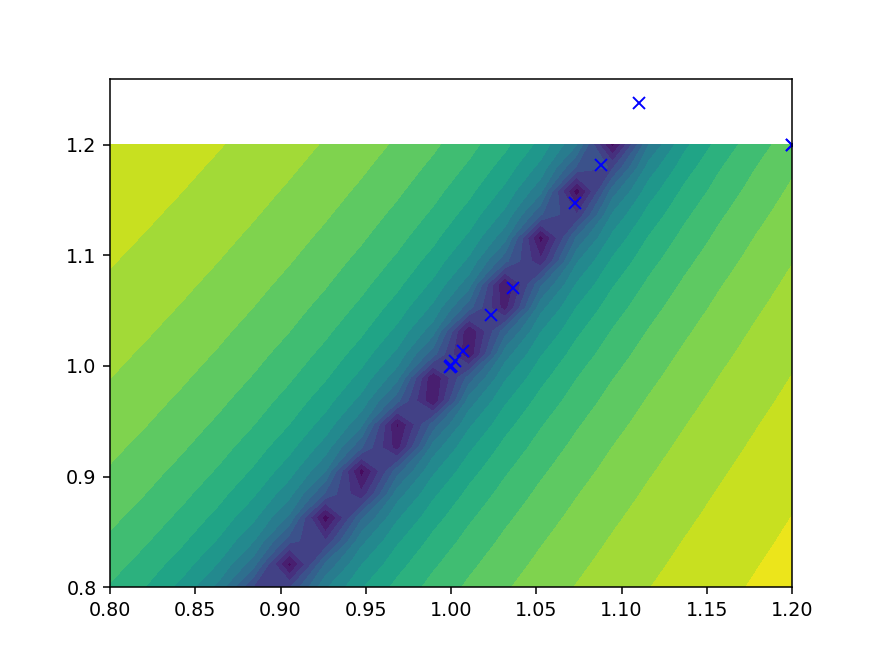

In [22]:
traceplot = TracePlot(trace,fun_class,xlim=[0.8,1.2],ylim=[0.8,1.2],plot_log=True)
fig, ax = plt.subplots()
traceplot.plot_contour(ax)

#x = np.arange(0, 2*np.pi, 0.01)
#line, = ax.plot(x, np.sin(x))


def animate(i):
    '''
    line.set_ydata(np.sin(x + i))  # update the data
    return line,
    '''
    '''
    ax.plot(x,np.sin(x)+i/100)
    '''
    '''
    ax.plot(i,i)
    '''
    pass


# Init only required for blitting to give a clean slate.
def init():
    '''
    line.set_ydata(np.ma.array(x, mask=True))
    return line,
    '''
    '''
    plot_class.plot_initial(ax)
    return ax
    '''


ani = animation.FuncAnimation(fig, traceplot.animate, np.arange(1, 19), #init_func=init,
                              interval=1000, blit=True)